In [39]:
#CELL-1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pumpkins = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week4/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [40]:
#CELL-2
pumpkin_var = pumpkins.groupby(pumpkins['Variety']).count()
pumpkin_var

,City Name,Type,Package,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
Variety,,,,,,,,,,,,,,,,,,,,,
FAIRYTALE,7,0,7,0,0,7,7,7,7,7,...,0,0,0,0,0,0,7,0,0,0
MINIATURE,262,0,262,248,0,262,262,262,238,238,...,11,0,0,0,0,0,262,0,0,24
MIXED HEIRLOOM VARIETIES,2,0,2,0,0,2,2,2,2,2,...,0,0,0,0,0,0,2,0,0,0
PIE TYPE,144,9,144,0,0,144,144,144,144,144,...,0,0,0,0,0,0,144,0,0,0


In [41]:

#CELL-3

from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
70            0        0        2       0          1      0
71            0        0        2       0          3      0
72            0        0        2       0          3      0
73            0        0        2       4          1      0
75            0        0        2       0          3      0
...         ...      ...      ...     ...        ...    ...
1236          5        2        1       4          3      1
1239          5        2        1       4          3      1
1257          4        0        2       3          1      0
1258          4        0        2       3          1      0
1259          4        0        2       3          1      0

[187 rows x 6 columns]>

To compare distributions of the data for each point in a side-by-side grid

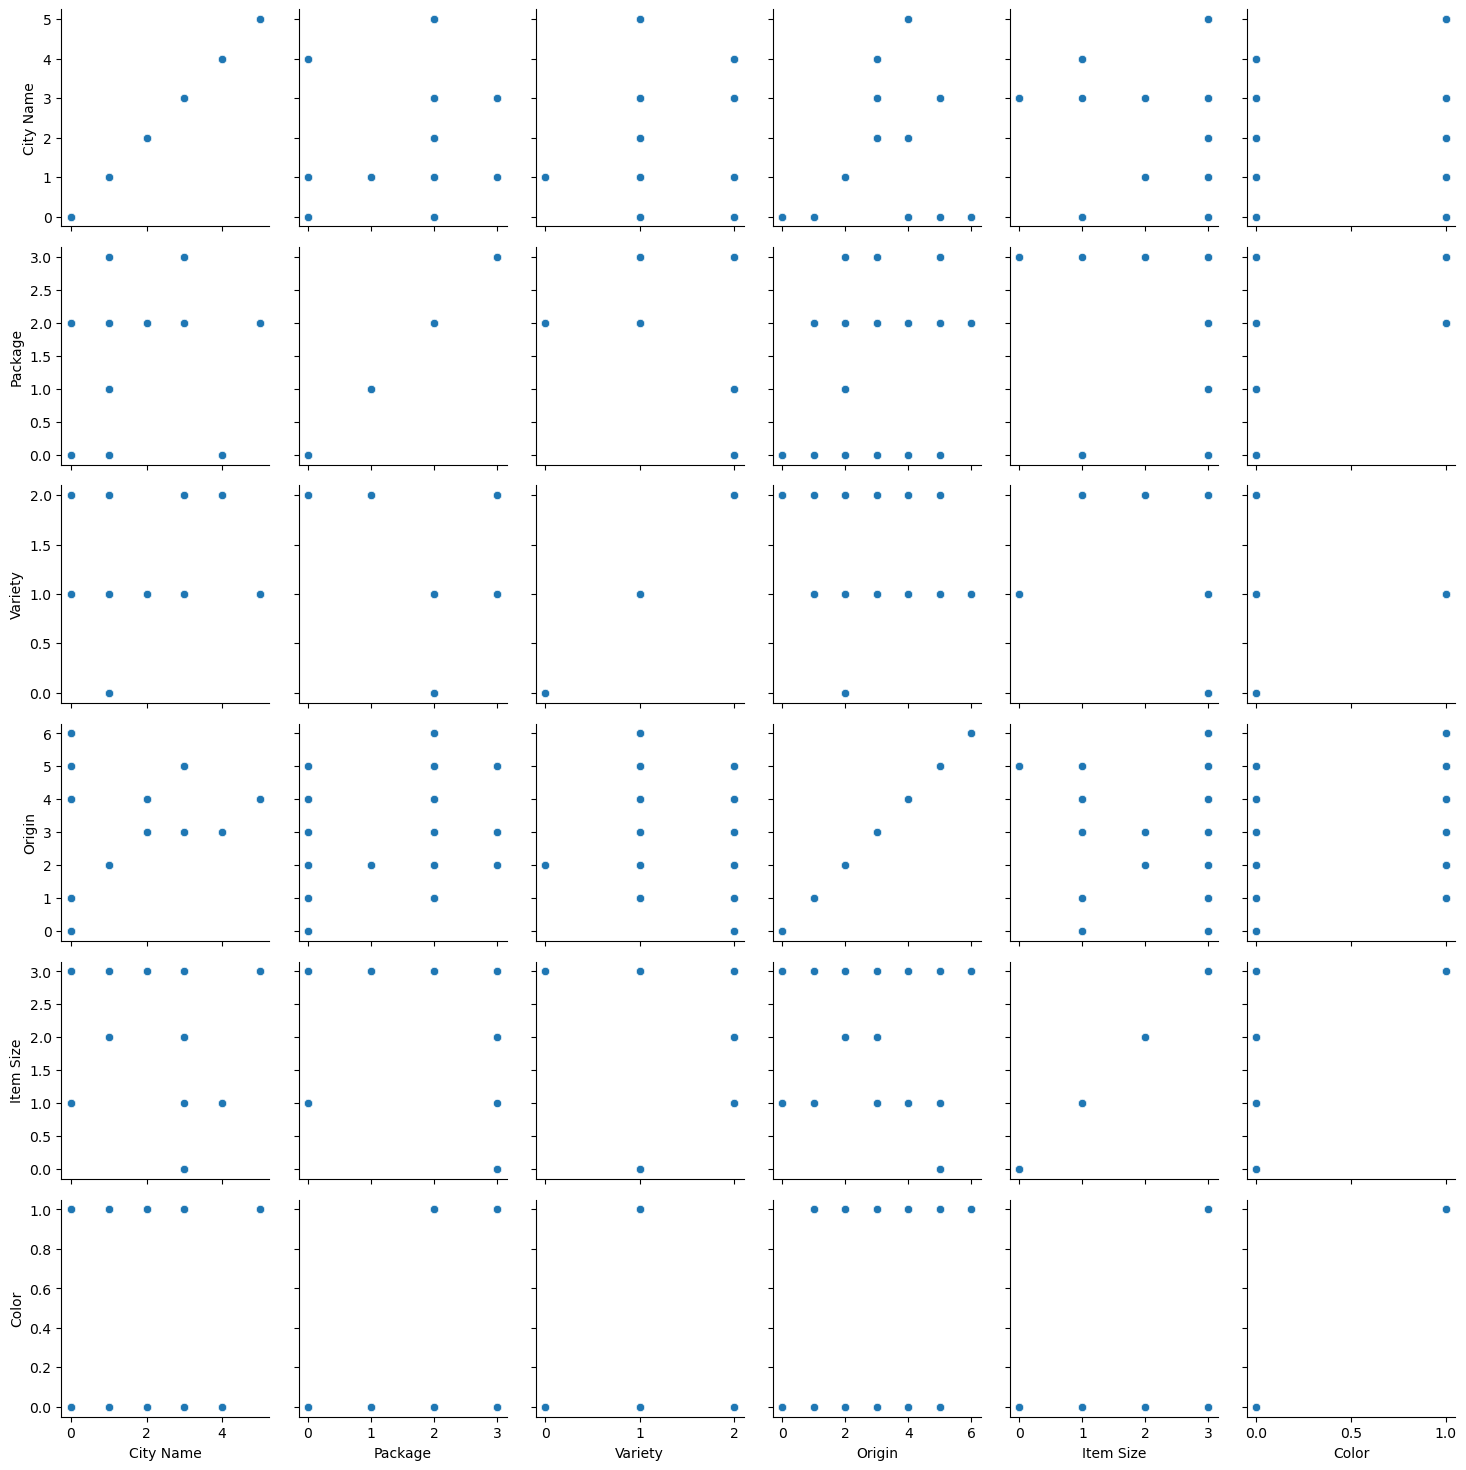

In [5]:
#CELL-4
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

**Use a swarm plot**

To visualize the relationship of this category with other variables. Swarmplot is used to show the distribution of values:

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Abdulrahman Yusuf\miniconda3\envs\dscience\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


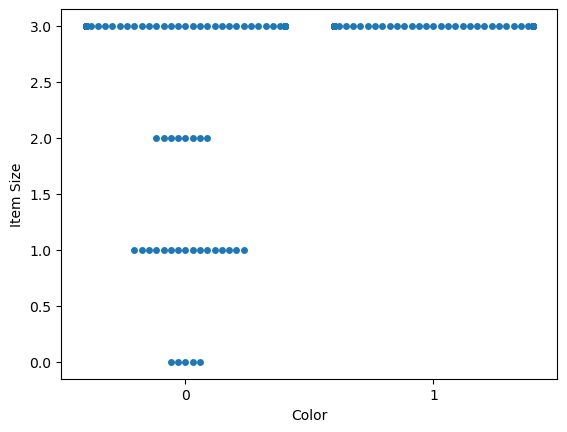

In [42]:
#CELL-5
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

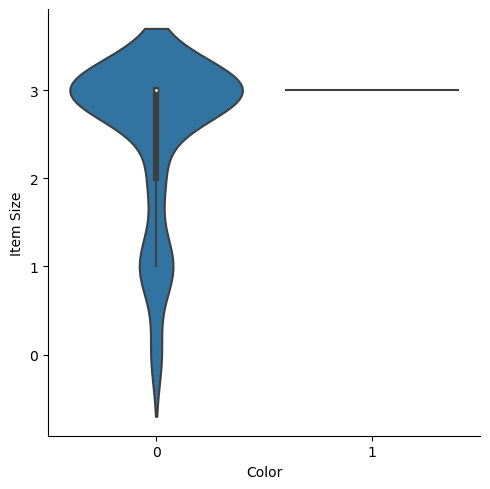

In [8]:
#CELL-6
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

Build A Logistic Regression Model

Select the variables you want to use in your classification model and split the training and test sets calling train_test_split():

In [43]:
#CELL-7
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
#CELL-7
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60        27
           1       0.28      0.45      0.34        11

    accuracy                           0.50        38
   macro avg       0.49      0.49      0.47        38
weighted avg       0.58      0.50      0.52        38

Predicted labels:  [1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1
 0]
Accuracy:  0.5


In [37]:
#CELL-8
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[14, 13],
       [ 6,  5]], dtype=int64)

In [1]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1])
sns.lineplot(fpr, tpr)

NameError: name 'model' is not defined

In [13]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6296296296296297
